# Calibration

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z  in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

In [4]:
cal1_path="/home/ema/Uni/LCP/LCPa_Project/180904/Run000260/data_000000.txt"
cal1={}
false_events_counter=0
with open(cal1_path) as cal1_file:
    for line in cal1_file:
        row=line.strip().split()
        key=int(row[0])
        n_hits=int(row[1])
        if n_hits!=0:
            data_array=np.array(row[2:]).reshape((n_hits, 5))
            data_dict={}
            columns=['chamber', 'layer', 'xleft', 'xright', 'time']
            for i in range(2):
                data_dict[columns[i]]=data_array[:, i].astype(int)
            for i in range(2,5):
                data_dict[columns[i]]=data_array[:, i].astype(float)
            value=pd.DataFrame(data_dict)
            cal1[key]=value
        else:
            false_events_counter+=1
print(f"null over nonnull events ratio (%) : {false_events_counter/(len(cal1)+false_events_counter)*100}%")

null over nonnull events ratio (%) : 40.931312637496944%


In [5]:
print(cal1[1].dtypes)

chamber      int64
layer        int64
xleft      float64
xright     float64
time       float64
dtype: object


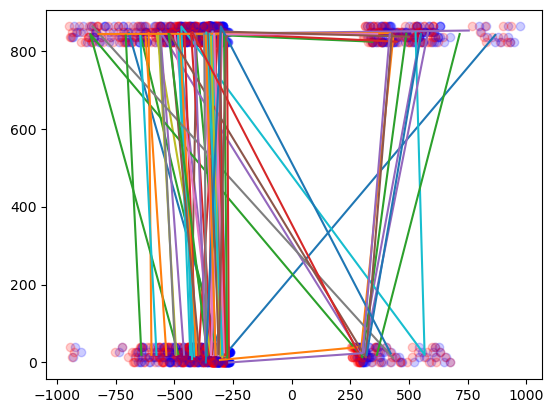

In [7]:

fig, ax=plt.subplots()
count=0
for event in cal1.values():
    event['xlg']=event.apply(lambda df: global_x_shifts[int(df['chamber'])]-df['xleft'], axis=1)
    event['xrg']=event.apply(lambda df: global_x_shifts[int(df['chamber'])]-df['xright'], axis=1)
    event['zg']=event.apply(lambda df: global_z_shifts[int(df['chamber'])]+local_z_shifts[int(df['layer'])-1], axis=1)
    
    ax.scatter(event['xlg'], event['zg'], color='blue', alpha=0.2)
    ax.scatter(event['xrg'], event['zg'], color='red', alpha=0.2)
    ax.plot((event.groupby('chamber').mean().reset_index()['xlg']+event.groupby('chamber').mean().reset_index()['xlg'])/2, event.groupby('chamber').mean().reset_index()['zg'], '-')
    count+=1
    if(count>=100):
        break
plt.show()


[(2515, '[2, 3]'), (429, '[0]'), (402, '[3]'), (353, '[0, 1]'), (255, '[1]'), (250, '[0, 2, 3]'), (128, '[2]'), (110, '[0, 1, 2, 3]'), (105, '[0, 3]'), (90, '[1, 2, 3]'), (71, '[0, 1, 3]'), (55, '[1, 3]'), (28, '[0, 2]'), (24, '[1, 2]'), (18, '[0, 1, 2]')]
('[2, 3]', '[0]', '[3]', '[0, 1]', '[1]', '[0, 2, 3]', '[2]', '[0, 1, 2, 3]', '[0, 3]', '[1, 2, 3]', '[0, 1, 3]', '[1, 3]', '[0, 2]', '[1, 2]', '[0, 1, 2]') (2515, 429, 402, 353, 255, 250, 128, 110, 105, 90, 71, 55, 28, 24, 18)


Text(0.5, 1.0, 'number of events for any combination of triggered chambers')

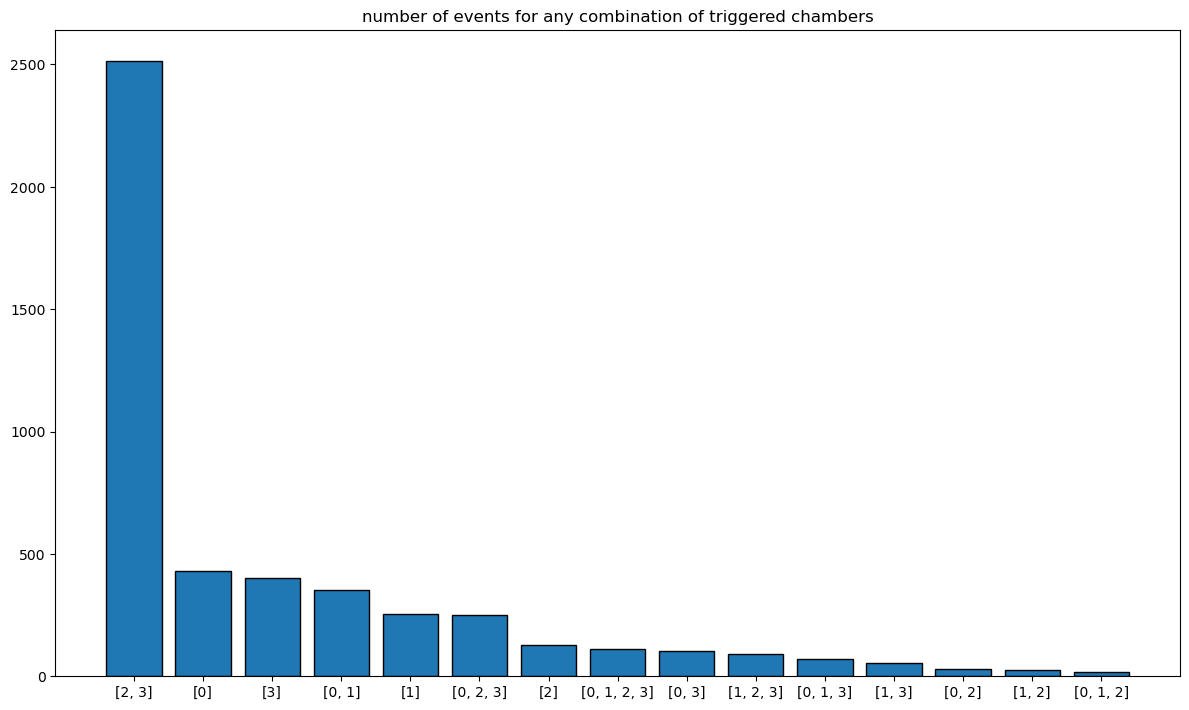

In [36]:
fig,ax=plt.subplots(figsize=(12,7))
bins, counts=(np.unique([str(sorted(np.unique(event['chamber']))) for event in cal1.values()], return_counts=True))
zipped=zip(counts, bins)
sortedzipped=sorted(zipped, reverse=True)
print(sortedzipped)
[counts, bins]=zip(*sortedzipped)
print(bins, counts)
ax.bar(bins, counts, edgecolor='black')
fig.tight_layout()
ax.set_title('number of events for any combination of triggered chambers')

(array([2., 0., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

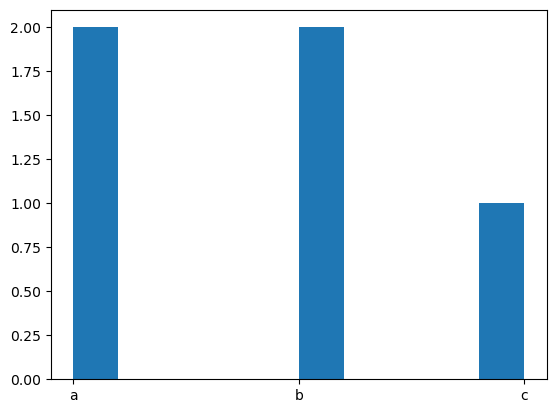

In [23]:
plt.hist(['a','b','c','a','b'])

In [ ]:
cal1[1]

In [ ]:
cal1[2]

In [ ]:
cal1[4]